In [2]:
import numpy as np

In [3]:
arr1 = np.array([1,2,3,4,5,])
print(arr1)
arr1

[1 2 3 4 5]


array([1, 2, 3, 4, 5])

In [4]:
type(arr1)

numpy.ndarray

In [5]:
arr1.ndim

1

In [8]:
arr2 = np.array([[1,2,3,4],[5,6,7,8]])
print(arr2)

[[1 2 3 4]
 [5 6 7 8]]


In [9]:
arr2.ndim

2

In [10]:
arr2.size

8

In [12]:
arr2.shape

(2, 4)

In [13]:
arr2.dtype

dtype('int32')

In [15]:
#1's matrix
np.array([[[1,1,1], [1,1,1],[1,1,1]]])

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [21]:
a1 = np.ones(5)
print(a1)
type(a1)
a1.dtype

[1. 1. 1. 1. 1.]


dtype('float64')

In [23]:
a2 = np.ones((5,5))
print(a2)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [34]:
np.ones((4,5) , dtype = int)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [31]:
a3 = np.zeros((4,6), dtype = str)
print(a3)

[['' '' '' '' '' '']
 ['' '' '' '' '' '']
 ['' '' '' '' '' '']
 ['' '' '' '' '' '']]


In [35]:
a3 = np.zeros((4,6), dtype = bool)
print(a3)

[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]


In [52]:
a4 = np.empty((2,1))
print(a4)

[[7.74860419e-304]
 [7.74860419e-304]]


In [54]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

Enter Your Email devanshikevat7041@gmail.com
Enter Your Password DCs@2023
Enter 1 for WAD, anyother for ML 3


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
Over
83.4319526627219


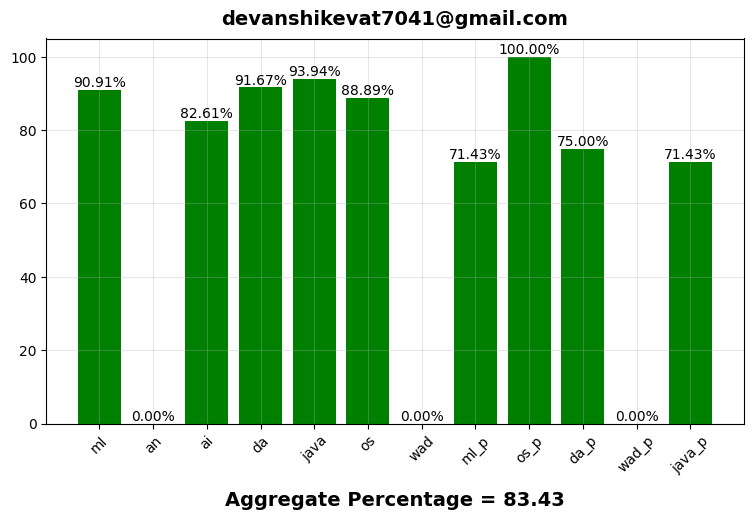

In [61]:
#!pip install pip install beautifulsoup4
#!pip install pip install requests

import requests as rs
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt

#######################################################################################################################################################################
static_data={"batch":"65002f422a409862cbbc94ce","course":"63df53dd88aba9c0e5c84b6f","division":"650034634b7fd7731ed772be",
                          "semester":"650034634b7fd7731ed772c3"}

subjects = {"ml":{"semesterSubject":"650034634b7fd7731ed772c4","subject":"63df53d388aba9c0e5c84b62"},
             "an":{"semesterSubject":"650034634b7fd7731ed772c5","subject":"63df53d388aba9c0e5c84b64"},
            "ai":{"semesterSubject":"650034634b7fd7731ed772c8","subject":"63df53d288aba9c0e5c84b5a"},
            "da":{"semesterSubject":"650034634b7fd7731ed772c9","subject":"63df53d288aba9c0e5c84b5c"},
             "java":{"semesterSubject": "650034634b7fd7731ed772ca","subject": "63df53d388aba9c0e5c84b5e"},
             "os":{"semesterSubject": "650034634b7fd7731ed772cb","subject": "63df53d388aba9c0e5c84b60"},
           "wad":{"semesterSubject": "650034634b7fd7731ed772c6","subject":"63df53d388aba9c0e5c84b66"},
           "ml_p":{"semesterSubject":"65dc2d63a7e811c54c1f9463","subject":"65dc2d2ea7e811c54c1f9451"},
           "os_p":{"semesterSubject":"65dc2d72a7e811c54c1f9477","subject":"65dc2ce7a7e811c54c1f9449"},
           "da_p":{"semesterSubject":"65dc2d7da7e811c54c1f9489","subject":"65dc2d03a7e811c54c1f944d"},
           "wad_p":{"semesterSubject":"65dc2d85a7e811c54c1f949b","subject":"65dc2cbea7e811c54c1f9445"},
           "java_p":{"semesterSubject":"65dc2d8ea7e811c54c1f94ad","subject":"65dc2c9da7e811c54c1f943f"}}


payload = {}

for key, value in subjects.items():
    payload[key] = {**static_data, **value}


#######################################################################################################################################################################

login_url = "https://attendence-system-1910.vercel.app/api/auth/login"
login_data = {"email":"send2biswojit@gmail.com","password":"DCs@2023"}
att_d_url = "https://attendence-system-1910.vercel.app/api/students/attendances/details"


try:
    login_data["email"]=input("Enter Your Email")
    login_data["password"]=input("Enter Your Password")
    track=input("Enter 1 for WAD, anyother for ML")
except:
    track=0

#######################################################################################################################################################################

data={}
with rs.Session() as s:
    response = s.post(login_url, data=login_data)
    if(response.status_code == 400):
        print("Sorry Login Failed")
    else:
        set_cookie_header = response.headers.get('Set-Cookie')
        token_start_index = set_cookie_header.find('token=') + len('token=')
        token_end_index = set_cookie_header.find(';', token_start_index)
        if token_end_index == -1:
            token = set_cookie_header[token_start_index:]
        else:
            token = set_cookie_header[token_start_index:token_end_index]

        header = {"Authorization": f"Bearer {token}"}

        for key in payload.keys():
            att_data=s.post(att_d_url,json=payload[key],headers=header)
            data[key]=att_data.json()
            print(att_data)
        print("Over")
    s.close()
data=pd.DataFrame(data)

#######################################################################################################################################################################
if(response.status_code != 400):
    plt.figure(figsize=[9,5])
    bars=plt.bar(data.columns,data.loc['percentage'],color='green')
    if(track==1):
        exclude=data.loc["total"]['ml']
    else:
        exclude=data.loc["total"]['wad']

    agg_percent=(data.loc["totalPresent"].sum()/(data.loc['total'].sum()-exclude))*100
    print(agg_percent)
    plt.xticks(rotation=45)
    plt.grid(True,alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
    plt.text(0.5, 1.05, login_data['email'], ha='center', va='center', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    plt.text(0.5, -0.20, f"Aggregate Percentage = {round(agg_percent,2)}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    plt.show()

#######################################################################################################################################################################

In [60]:
print(exclude)

24.0


In [ ]:
from socket import *
serverName = 'hostname'
serverPort = 12000
clientSocket = socket(AF_INET, SOCK_DGRAM)
message = input('input lower case sentence')
clientSocket.sendto(message.encode(), (serverName, serverPort))
modifiedMessage, serverAddress = clientSocket.recvfrom(2048)
print(modifiedMessage.decode())
clientSocket.close()

In [ ]:
from socket import *
# serverName = 'hostname'
serverPort = 12000
serverSocket = socket(AF_INET, SOCK_DGRAM)
serverSocket.bind(('',serverPort))
print('The Server is ready to receive') 
while True:
    message, clientAddress = serverSocket.recvfrom(2048)
    modifiedMessage = message.decode().upper()
    serverScoket.sendto(modifiedMessage.encode(), clientAddress)

The Server is ready to receive
